<a href="https://colab.research.google.com/github/anastasiia-vsk/Start-into-ML/blob/main/%D0%92%D0%B0%D1%81%D1%8C%D0%BA%D0%BE_%D0%BF%D1%803.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Завдання 1: Лінійна регресія на основі Diabetes Dataset

In [ ]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target

1. Вивести перших 5 рядків.

In [ ]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0



2. Перевірити наявність пропусків. У разі виявлення замінити на середнє значення.

In [ ]:
data.isnull().sum()

# пропущених значень не виявлено

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


3. Перевірити наявність дублікатів, при виявленні – видалити.

In [ ]:
data.drop_duplicates(inplace=True)

4. Замінити бінарні ознаки. У стовпчику «стать» спочатку перевірте унікальні значення.

In [ ]:
data.sex.unique()

array([ 0.05068012, -0.04464164])

In [ ]:
data['sex'] = data['sex'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
data['sex'].unique()

array([1, 0])

5. Перевірити тип даних. При необхідності замінити тип даних на числовий.

In [ ]:
print(data.dtypes)

age       float64
sex         int64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


6. Обчислити кореляцію між прогресом діабету і іншмим ознаками. Розташувати в порядку спадання.
Побудувати теплову карту кореляції.


In [ ]:
correlation = data.corr()
print(correlation['target'].sort_values(ascending=False))

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


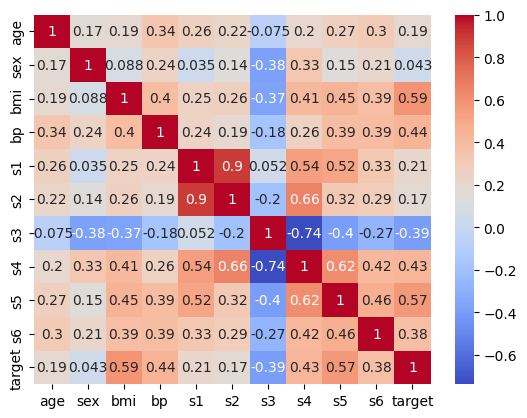

In [ ]:
sns.heatmap(correlation, annot=True, cmap='coolwarm');


7. Масштабувати ознаки.

In [ ]:
data.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')

*Обираємо найбільш корилюючі ознаки для вхідних даних.*

In [ ]:
inputs = data[['bmi', 's5', 'bp', 's4']]

In [ ]:
targets = data['target']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(inputs)

8. Поділити дані на тренувальну і тестову вибірки.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, targets, test_size=0.2, random_state=42)

9. Побудувати модель лінійной регресії і RandomForest регресії на основі більш корелюючих ознак (підібрати оптимальне число).

In [ ]:
# Лінійна регресія
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

In [ ]:
# RandomForest регресія
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

10. Вивести коефіцієнт детермінації і середньоквадратичну помилку.

In [ ]:
print(f'Лінійна регресія R2: {r2_score(y_test, y_pred_lr)}')
print(f'Лінійна регресія MSE: {mean_squared_error(y_test, y_pred_lr)}')
print(f'RandomForest регресія R2: {r2_score(y_test, y_pred_rf)}')
print(f'RandomForest регресія MSE: {mean_squared_error(y_test, y_pred_rf)}')

Лінійна регресія R2: 0.4525840776044413
Лінійна регресія MSE: 2900.2926264058574
RandomForest регресія R2: 0.43475868768207904
RandomForest регресія MSE: 2994.734247191011


11. Побудувати графіки.

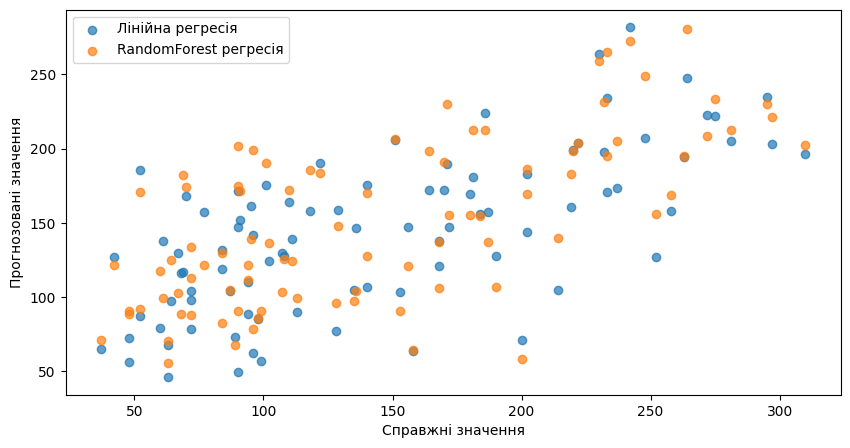

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_lr, label='Лінійна регресія', alpha=0.7)
plt.scatter(y_test, y_pred_rf, label='RandomForest регресія', alpha=0.7)
plt.xlabel('Справжні значення')
plt.ylabel('Прогнозовані значення')
plt.legend()
plt.show()

Лінійна регресія R2: 0.4525840776044413
RandomForest регресія R2: 0.43475868768207904


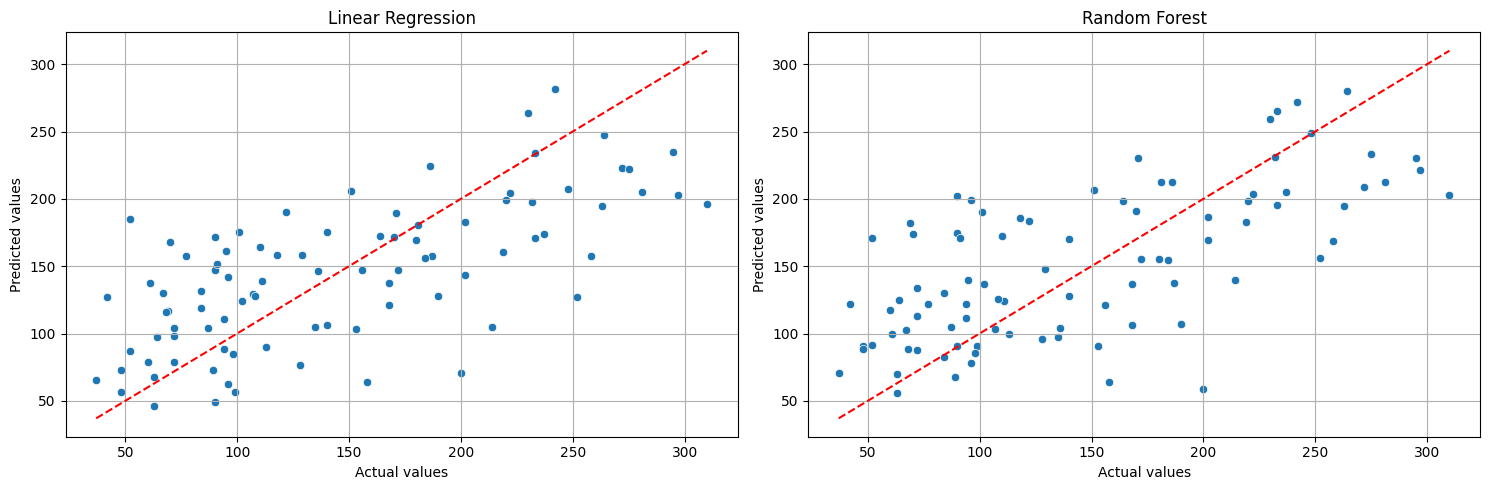

In [ ]:
plt.figure(figsize=(15, 5))

# Scatter plot для Лінійної регресії
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=lin_reg.predict(X_test))
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Linear Regression')
plt.grid(True)

# Scatter plot для Random Forest
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=rf_reg.predict(X_test))
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Random Forest')
plt.grid(True)

# Відображення графіків
print(f'Лінійна регресія R2: {r2_score(y_test, y_pred_lr)}')
print(f'RandomForest регресія R2: {r2_score(y_test, y_pred_rf)}')
plt.tight_layout()
plt.show()

12. Вивести справжні і прогнозовані значення.

In [ ]:
print("Справжні значення:", y_test.values[:5])
print("Прогнозовані значення (Лінійна регресія):", y_pred_lr[:7])
print("Прогнозовані значення (RandomForest):", y_pred_rf[:7])

Справжні значення: [219.  70. 202. 230. 111.]
Прогнозовані значення (Лінійна регресія): [160.62004885 167.85736591 182.69163477 264.05656673 139.12852231
 118.87286998 281.86330736]
Прогнозовані значення (RandomForest): [182.59 174.26 186.62 259.27 124.05  82.79 272.26]


13. ВИСНОВКИ

В даному випадку обидві моделі (лінійна регресія та RandomForest) показали низькі показники точності, з R² трохи більше 0.4, що свідчить про те, що вони пояснюють лише близько 40% варіації в даних. Значення MSE є досить високими, що вказує на значні помилки в передбаченнях. Лінійна регресія продемонструвала дещо кращі результати в порівнянні з RandomForest, проте обидві моделі потребують подальшого налаштування гіперпараметрів для покращення прогнозування.

## Завдання 2: Лінійна регресія на основі California Housing Dataset

1. Провести попередній аналіз даних за схемою.

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
california = fetch_california_housing()
data_house = pd.DataFrame(data=california.data, columns=california.feature_names)
data_house['target'] = california.target

data_house.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
data_house.isnull().sum()
# data_house.fillna(data_house.mean(), inplace=True)

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0


In [ ]:
data_house.duplicated().sum()
# data_house.drop_duplicates(inplace=True)

0

In [ ]:
data_house.dtypes

,0
MedInc,float64
HouseAge,float64
AveRooms,float64
AveBedrms,float64
Population,float64
AveOccup,float64
Latitude,float64
Longitude,float64
target,float64



2. Масштабувати ознаки.

In [ ]:
X_scaled = scaler.fit_transform(data_house.drop('target', axis=1))
y = data_house['target']

3. Поділити дані на тренувальні і тестові.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


5. Вивести R2 і MSE. Побудувати графіки.

6. Вивести справжні і прогнозовані значення.


4. Побудувати 3 моделі: лін. Регресія, регресія випадковий ліс, Ridge. Підібрати оптимальні параметри за допомогою GridSeach.

In [ ]:
models = {
    'Лінійна регресія': LinearRegression(),
    'RandomForest регресія': RandomForestRegressor(n_estimators=100, random_state=42),
    'Ridge регресія': Ridge()
}

In [ ]:
ridge_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, ridge_params, cv=5)
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1.0, 10.0, 100.0]})

In [ ]:
print("Найкращі параметри для Ridge:", ridge_cv.best_params_)

Найкращі параметри для Ridge: {'alpha': 0.1}


In [ ]:
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
rf = RandomForestRegressor(random_state=42)
rf_cv = GridSearchCV(rf, rf_params, cv=5, n_jobs=-1, verbose=2)
rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [ ]:
print("Найкращі параметри для RandomForest:", rf_cv.best_params_)

Найкращі параметри для RandomForest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


Linear Regression R2: 0.5757877060324511
Linear Regression MSE: 0.555891598695244


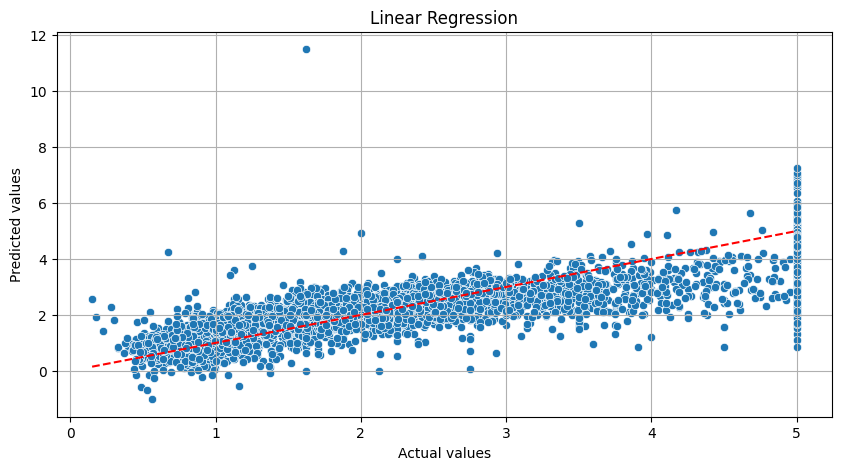

Ridge Regression R2: 0.5757907979394903
Ridge Regression MSE: 0.5558875470324999


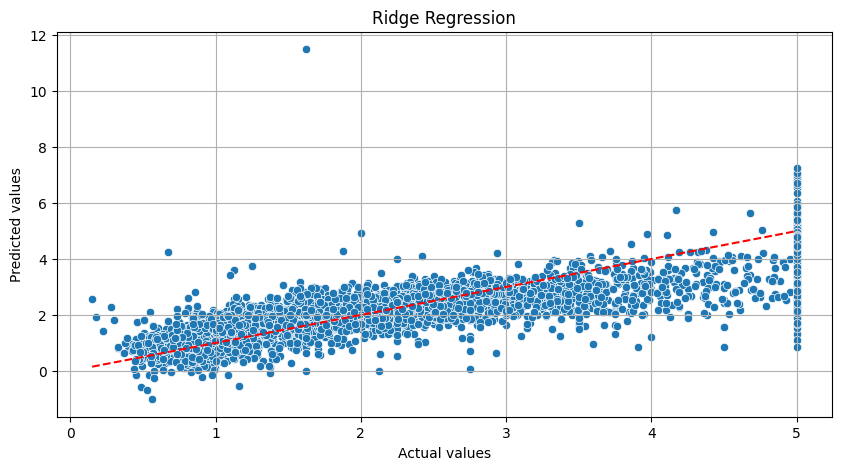

RandomForest Regression R2: 0.8056479624647508
RandomForest Regression MSE: 0.2546806549256028


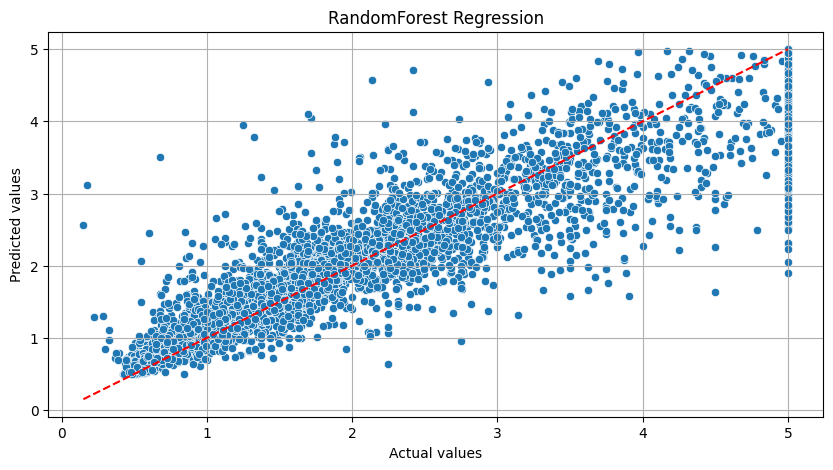

Справжні значення: [0.477   0.458   5.00001 2.186   2.78   ]


In [ ]:
# Оцінка всіх моделей
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': ridge_cv.best_estimator_,
    'RandomForest Regression': rf_cv.best_estimator_
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{name} R2: {r2_score(y_test, y_pred)}')
    print(f'{name} MSE: {mean_squared_error(y_test, y_pred)}')

    # Побудова графіків
    plt.figure(figsize=(10,5))
    sns.scatterplot(x=y_test, y=y_pred)
    sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color='red', linestyle='--')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.title(name)
    plt.grid(True)
    plt.show()

# Порівнюємо
print("Справжні значення:", y_test.values[:5])

ВИСНОВКИ

Результати показують, що RandomForest Regression значно перевершує обидві регресії, як лінійну, так і Ridge, із значенням R² на рівні 0.81, що вказує на високу здатність цієї моделі пояснювати варіації в даних. Значення MSE для RandomForest Regression також є значно нижчим (0.25), що свідчить про менші похибки в прогнозах порівняно з лінійною регресією та Ridge Regression, де значення MSE знаходяться на рівні 0.56.
Таким чином, RandomForest Regression є кращою моделлю для прогнозування в даному випадку.